# Stochastic Variational Inference with NumPyro

Previously we learned 

- how to write probabilistic models and perform MCMC with `numpyro`
- the fundamental ideas of variational inference (VI)

In this lesson we will explore the tools offered by `numpyro` to obtain approximate variational posteriors. The unified interface for VI in `numpyro` is located in [`numpyro.infer.SVI`](https://num.pyro.ai/en/stable/svi.html)

The arguments of the `SVI` object are

```python
numpyro.infer.SVI(model, # A function that defines the generative model 
                  guide, # A function that defines the approximate posterior
                  optim, # A "gradient-descent-based" optimizer
                  loss, # The cost function, a variant of the ELBO
                  static_kwargs # (Optional) Static arguments of model
                 )
```

:::{seealso}

SVI corresponds to [Stochastic Variational inference](https://www.jmlr.org/papers/volume14/hoffman13a/hoffman13a.pdf), a methodology to scale VI to large databases by subsampling. In SVI, the cost function and its derivatives are estimated as averages over minibatches of data. In summary, SVI is the combination of VI and Stochastic Gradient Descent (SGD)

:::


Through this lesson we consider the following data as example

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
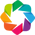

:ErrorBars   [x]   (y,yerror)

In [1]:
import holoviews as hv
hv.extension('bokeh')
import jax.numpy as jnp
import jax.random as random
import numpyro.distributions as dists
import numpyro

numpyro.set_platform("cpu") 
numpyro.set_host_device_count(2) 
# print(numpyro.__version__)

key = random.PRNGKey(1234)
w_true, b_true, s_true = 0.5, -0.7, 1.
x = jnp.sort(dists.Normal(0, 5).rsample(key, sample_shape=(10,)))
y = w_true*x + b_true
key, subkey = random.split(key)
y += dists.Normal(0, s_true).rsample(key, sample_shape=(len(y),))

hv.ErrorBars((x, y, s_true)).opts(width=500)

which we will model using a bayesian linear regression

<img src="images/linear_regression_plate.png" width="500">

with hyperparameters $\mu_b = \mu_\sigma=0$ and $\sigma_b = \sigma_w = \gamma = 10$

In [2]:
def model(x, y=None):
    w = numpyro.sample("w", dists.Normal(0.0, 10.0))
    b = numpyro.sample("b", dists.Normal(0.0, 10.0))
    s = numpyro.sample("s_eps", dists.HalfCauchy(10.0))
    with numpyro.plate("data", size=len(x)):
        mu = numpyro.deterministic("mu", x*w+b)
        y = numpyro.sample("y", dists.Normal(mu, s), obs=y)
    return mu

In what follows we review how to set-up the SVI object to obtain a variational posterior for this numpyro model

## Guide function

The guide represents $q_\nu(\theta)$, i.e. it has to specify the approximate posterior distribution of the parameters of the model

In practice, a numpyro guide is a Python function that has to comply with the following:

- The input arguments have to be the same as those in the model function
- Every `numpyro.sample` in the model function needs a `numpyro.sample` using the same name in the guide
- The primitive [`numpyro.param`](https://num.pyro.ai/en/stable/primitives.html#numpyro.primitives.param) is used to register the hyperparameters of these latent variables 

For the bayesian linear regression $\theta = (w, b, s)$. As an example we will implement a fully factored normal guide following

$$
\begin{split}
q_\nu(w,b,s) &= q_{\nu_w}(w)q_{\nu_b}(b) q_{\nu_s}(s) \\
&= \mathcal{N}(w|\mu_w, \sigma_w^2) \mathcal{N}(b|\mu_b, \sigma_b^2) \mathcal{N}(\log(s)|\mu_{\log s}, \sigma_{\log s}^2)
\end{split}
$$

The hyperparameters are $\nu = (\mu_w, \sigma_w, \mu_b, \sigma_b, \mu_{\log s}, \sigma_{\log s})$. We need to register every parameter in $\nu$ using `numpyro.param` as  these are the values that we will optimize using `SVI`

In [3]:
from numpyro.distributions import constraints

def guide(x, y=None): 
    # slope
    w_loc = numpyro.param("w_loc", 0.0)
    w_scale = numpyro.param("w_scale", 0.1, constraint=constraints.positive)
    w = numpyro.sample("w", dists.Normal(w_loc, w_scale))
    # intercept
    b_loc = numpyro.param("b_loc", 0.0)
    b_scale = numpyro.param("b_scale", 0.1, constraint=constraints.positive)
    b = numpyro.sample("b", dists.Normal(b_loc, b_scale))
    # noise variance
    s_loc = numpyro.param("s_log_loc", 0.0)
    s_scale = numpyro.param("s_log_scale", 0.1, constraint=constraints.positive)
    s = numpyro.sample("s_eps", dists.TransformedDistribution(dists.Normal(s_loc, s_scale), 
                                                          dists.transforms.ExpTransform()))

:::{note}

We can restrict the value taken by a `param` using the `constraint` argument. The [`constraints`](https://num.pyro.ai/en/stable/distributions.html#constraints) submodule offers non-negativity, truncated, circular and simplex constraints, among others

:::



## Loss function

In the previous lesson we studied the Evidence Lower Bound (ELBO)

$$
\begin{split}
\hat \nu &= \text{arg}\max_\nu \mathcal{L}(\nu)  \\
&= \text{arg}\max_\nu \int q_\nu(\theta) \log \frac{p(\mathcal{D}|\theta) p (\theta)}{q_\nu(\theta)} d\theta
\end{split}
$$

where

- The model function defines $p(\mathcal{D}|\theta) p (\theta)$ 
- The guide function defines $q_\nu(\theta)$ 

Numpyro offers several versions of the ELBO in `numpyro.infer`, the most common are:

- [`Trace_ELBO`](https://num.pyro.ai/en/stable/svi.html#trace-elbo): Default ELBO. Reduces variance of the gradients using "Rao-Blackwellization"
- [`TraceMeanField_ELBO`](https://num.pyro.ai/en/stable/svi.html#tracemeanfield-elbo): Assumes Mean-field structure. Reduce variance of gradients using analytical KL when possible

We will study the importance of gradient variance later

## Training

The main methods of the SVI object are

- `init`: Expects a PRNG key and the model/guide arguments. Initializes the SVI object and returns an SVI state
- `get_params`: Expects an SVI state. Returns a dictionary with the model parameters
- `update`: Expects an SVI state and the model/guide arguments. Performs a gradient descent step. Returns the update state and the value of the loss

:::{note}

`svi.update` is similar to the `backward()` plus `step()` in pytorch

:::

In this example we select the Adam algorithm as optimizer and the default ELBO as loss function. The example also demostrates how to use `jax.jit` to improve the computational efficiency of `update`

:::{note}

[Any `optax` optimizer](https://num.pyro.ai/en/stable/optimizers.html#optax-support) can be used with `SVI`

:::

In [4]:
%%time

from jax import jit
import optax
from tqdm.notebook import tqdm

def train_svi(guide, key, lr=0.01, nepochs=1000):
    svi = numpyro.infer.SVI(model, guide, optax.adam(lr), loss=numpyro.infer.Trace_ELBO())
    state = svi.init(key, x, y)
    
    loss_evolution = []
    param_names = list(svi.get_params(state).keys())
    print(param_names)
    param_evolution = {param: [] for param in param_names}
    
    jit_update = jit(svi.update)
    for epoch in tqdm(range(nepochs)):
        state, loss = jit_update(state, x, y)
        loss_evolution.append(loss.item())
        current_params = svi.get_params(state)
        for name, value in current_params.items():
            param_evolution[name].append(value)

    for name, value in current_params.items():
        param_evolution[name] = jnp.stack(param_evolution[name])
    return svi, state, loss_evolution, param_evolution
 
key, key_ = random.split(key)  
svi, state, loss_evolution, param_evolution = train_svi(guide, key_)    

['b_loc', 'b_scale', 's_log_loc', 's_log_scale', 'w_loc', 'w_scale']


  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 4.59 s, sys: 30 ms, total: 4.62 s
Wall time: 4.62 s


The evolution of the ELBO:

In [5]:
hv.Curve(loss_evolution, 'Epoch', 'Loss').opts(width=500)

:Curve   [Epoch]   (Loss)

And the evolution of the registered parameters:

In [6]:
curves = [hv.Curve(param_evolution[name], 
                   'Epoch', 'Locations', label=name) for name in ['b_loc', 'w_loc', 's_log_loc']]
loc_plots = hv.Overlay(curves).opts(legend_position='top', width=320)
curves = [hv.Curve(param_evolution[name], 
                   'Epoch', 'Scales', label=name) for name in ['b_scale', 'w_scale', 's_log_scale']]
scale_plots = hv.Overlay(curves).opts(legend_position='top', width=320)
loc_plots + scale_plots

:Layout
   .Overlay.I  :Overlay
      .Curve.B_loc     :Curve   [Epoch]   (Locations)
      .Curve.W_loc     :Curve   [Epoch]   (Locations)
      .Curve.S_log_loc :Curve   [Epoch]   (Locations)
   .Overlay.II :Overlay
      .Curve.B_scale     :Curve   [Epoch]   (Scales)
      .Curve.W_scale     :Curve   [Epoch]   (Scales)
      .Curve.S_log_scale :Curve   [Epoch]   (Scales)

:::{tip}

When learning more complex models on larger datasets we should consider partitioning the dataset into training and validation subsets to verify ELBO convergence (early stopping). 

:::

## Inspecting the posterior


The `Predictive` object from `numpyro.infer` can be used to obtain the posterior of the parameters and the predictive posterior over new test data

Instead of passing `posterior_samples` (as in MCMC) we pass the guide function and the learned parameters

In [7]:
predictive = numpyro.infer.Predictive(model, 
                                      guide=svi.guide, 
                                      params=svi.get_params(state), 
                                      return_sites=['w', 'b', 's_eps', 'mu'],
                                      num_samples=1000)

x_test = jnp.linspace(-12, 12, num=100)
posterior_samples = predictive(random.PRNGKey(1), x_test)

In [8]:
def plot_marginals(posterior_samples):
    dist_w = hv.Distribution(posterior_samples['w'], 'w') * hv.VLine(w_true) 
    dist_b = hv.Distribution(posterior_samples['b'], 'b') * hv.VLine(b_true) 
    dist_s = hv.Distribution(posterior_samples['s_eps'], 's_eps') * hv.VLine(s_true) 
    return dist_b + dist_w + dist_s

plot_marginals(posterior_samples)

:Layout
   .Overlay.I   :Overlay
      .Distribution.I :Distribution   [b]   (Density)
      .VLine.I        :VLine   [x,y]
   .Overlay.II  :Overlay
      .Distribution.I :Distribution   [w]   (Density)
      .VLine.I        :VLine   [x,y]
   .Overlay.III :Overlay
      .Distribution.I :Distribution   [s_eps]   (Density)
      .VLine.I        :VLine   [x,y]

In [9]:
def plot_joint_posterior(posterior_samples, param1, param2):
    posterior = hv.Bivariate(jnp.stack((posterior_samples[param1], posterior_samples[param2])).T, 
                             kdims=[param1, param2])
    return posterior.opts(cmap='Blues', line_width=0,
                          filled=True, width=300, axiswise=True)

hv.Layout([plot_joint_posterior(posterior_samples, 'w', 'b'),
           plot_joint_posterior(posterior_samples, 's_eps', 'b'),
           plot_joint_posterior(posterior_samples, 's_eps', 'w')
          ])

:Layout
   .Bivariate.I   :Bivariate   [w,b]   (Density)
   .Bivariate.II  :Bivariate   [s_eps,b]   (Density)
   .Bivariate.III :Bivariate   [s_eps,w]   (Density)

:::{note}

Remember we used a factored normal guide, we expect no correlations

:::

In [10]:
def plot_predictive(posterior_samples):
    low, mid, upper = jnp.quantile(posterior_samples['mu'], jnp.array([0.01, 0.5, 0.99]), axis=0)
    median = hv.Curve((x_test, mid)).opts(width=500, color='#30a2da')
    data = hv.ErrorBars((x, y, s_true))
    uncertainty = hv.Area((x_test, low, upper), vdims=['y', 'y2']).opts(color='#30a2da', alpha=0.3)
    return median * data * uncertainty

plot_predictive(posterior_samples)

:Overlay
   .Curve.I     :Curve   [x]   (y)
   .ErrorBars.I :ErrorBars   [x]   (y,yerror)
   .Area.I      :Area   [x]   (y,y2)

## Autoguides

Given a model, `numpyro` offers functions to generate guides automatically from it. These are found at [`numpyro.infer.autoguide`](https://num.pyro.ai/en/stable/autoguide.html)

:::{note}

The guide we previously wrote is roughly equivalent to `AutoDiagonalNormal/AutoNormal`, a guide where the latent variables are normal and independent

:::

Other interesting auto guides are

- [`AutoMultivariateNormal`](https://num.pyro.ai/en/stable/autoguide.html#automultivariatenormal): Models correlation between the latent variables 
- [`AutoLowRankMultivariateNormal`](https://num.pyro.ai/en/stable/autoguide.html#autolowrankmultivariatenormal): Similar to the previous one, but using a low rank covariance matrix. Consider it when latent dimensionality is large 
- [`AutoDelta`](https://num.pyro.ai/en/stable/autoguide.html#autodelta): Returns the Maximum a Posteriori estimate
- [`AutoLaplaceApproximation`](https://num.pyro.ai/en/stable/autoguide.html#autolaplaceapproximation): Multivariate normal guide centered on the MAP with variance equal to the negative hessian
- [`AutoIAFNormal`](https://num.pyro.ai/en/stable/autoguide.html#autoiafnormal): Uses a sequence of bijective transformations starting from a Gaussian to obtain a more flexible distribution (more in this in future lessons)

The arguments of an AutoGuide are

- A numpyro model
- `prefix` (Optional): A string to name the internal parameters
- `init_loc_fn`(Optional): [An initialization scheme](https://num.pyro.ai/en/stable/utilities.html#init-strategy)

Let's see some examples

In [11]:
from numpyro.infer.autoguide import AutoDelta, AutoMultivariateNormal

In [12]:
%%time
key, key_ = random.split(key)  
svi, state, loss_evolution, param_evolution = train_svi(AutoDelta(model, prefix='MAP'), 
                                                        key_, nepochs=300)    

['b_MAP_loc', 's_eps_MAP_loc', 'w_MAP_loc']


  0%|          | 0/300 [00:00<?, ?it/s]

CPU times: user 3.49 s, sys: 13.3 ms, total: 3.5 s
Wall time: 3.51 s


In [13]:
hv.Curve(loss_evolution, 'Epoch', 'Loss').opts(width=500, logy=True)

:Curve   [Epoch]   (Loss)

In [14]:
svi.get_params(state)

{'b_MAP_loc': DeviceArray(-0.7979058, dtype=float32),
 's_eps_MAP_loc': DeviceArray(0.7400651, dtype=float32),
 'w_MAP_loc': DeviceArray(0.52685213, dtype=float32)}

In [15]:
predictive = numpyro.infer.Predictive(model, 
                                      guide=svi.guide, 
                                      params=svi.get_params(state), 
                                      return_sites=['w', 'b', 's_eps', 'mu'],
                                      num_samples=1000)

x_test = jnp.linspace(-12, 12, num=100)
posterior_samples = predictive(random.PRNGKey(1), x_test)

plot_predictive(posterior_samples)

:Overlay
   .Curve.I     :Curve   [x]   (y)
   .ErrorBars.I :ErrorBars   [x]   (y,yerror)
   .Area.I      :Area   [x]   (y,y2)

:::{note}

The `AutoDelta` guide returns point estimates (MAP)

:::

In [16]:
%%time
key, key_ = random.split(key)  
svi, state, loss_evolution, param_evolution = train_svi(AutoMultivariateNormal(model, prefix='MVN'), 
                                                        key_, nepochs=4000)

['MVN_loc', 'MVN_scale_tril']


  0%|          | 0/4000 [00:00<?, ?it/s]

CPU times: user 29.5 s, sys: 180 ms, total: 29.7 s
Wall time: 29.6 s


In [17]:
hv.Curve(loss_evolution, 'Epoch', 'Loss').opts(width=500, logy=True)

:Curve   [Epoch]   (Loss)

In [18]:
predictive = numpyro.infer.Predictive(model, 
                                      guide=svi.guide, 
                                      params=svi.get_params(state), 
                                      return_sites=['w', 'b', 's_eps', 'mu'],
                                      num_samples=1000)

x_test = jnp.linspace(-12, 12, num=100)
posterior_samples = predictive(random.PRNGKey(1), x_test)

plot_marginals(posterior_samples)

:Layout
   .Overlay.I   :Overlay
      .Distribution.I :Distribution   [b]   (Density)
      .VLine.I        :VLine   [x,y]
   .Overlay.II  :Overlay
      .Distribution.I :Distribution   [w]   (Density)
      .VLine.I        :VLine   [x,y]
   .Overlay.III :Overlay
      .Distribution.I :Distribution   [s_eps]   (Density)
      .VLine.I        :VLine   [x,y]

In [19]:
hv.Layout([plot_joint_posterior(posterior_samples, 'w', 'b'),
           plot_joint_posterior(posterior_samples, 's_eps', 'b'),
           plot_joint_posterior(posterior_samples, 's_eps', 'w')
          ])

:Layout
   .Bivariate.I   :Bivariate   [w,b]   (Density)
   .Bivariate.II  :Bivariate   [s_eps,b]   (Density)
   .Bivariate.III :Bivariate   [s_eps,w]   (Density)

:::{note}

The `AutoMultivariateNormal` guide models the correlation between $b$ and $w$

:::

In [20]:
plot_predictive(posterior_samples)

:Overlay
   .Curve.I     :Curve   [x]   (y)
   .ErrorBars.I :ErrorBars   [x]   (y,yerror)
   .Area.I      :Area   [x]   (y,y2)

:::{seealso}

See [pyro's tips and tricks](https://pyro.ai/examples/svi_part_iv.html) for SVI, they apply to numpyro

:::